<a href="https://colab.research.google.com/github/ancestor9/24_fall_textmining_NLP/blob/main/1119_sklearn_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Why Deep Leraning : Scikit과 learn과 Keras**
- **모델의 Parameter(전후) --> 학습이란?**
- **Stochastic Gradient Descent(SGD) 알고리즘**
- **KNN과 Deep learning(FNN, CNN)의 이해**
- **데이터와 모델의 복잡성 --> 성능의 관계**
- **Embedding layer**

<img src='https://external-preview.redd.it/ZaCiq0wO-W-1BvIA8WkNCBiw1WD65oWdMv_0vsYuOxY.jpg?auto=webp&s=38b5bcfe99e6ef2dbdf48095b094f15fd7924dbf' width=500>

In [1]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense

# 1. 데이터 생성
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# 2. 학습 및 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. scikit-learn Linear Regression 모델 생성 및 학습 전 파라미터 출력
sklearn_model = LinearRegression()
print(f"[scikit-learn] 초기 파라미터: 절편 = {sklearn_model.intercept_ if hasattr(sklearn_model, 'intercept_') else 'Not Fitted'}, 기울기 = {sklearn_model.coef_ if hasattr(sklearn_model, 'coef_') else 'Not Fitted'}")

# 4. scikit-learn 모델 학습
sklearn_model.fit(X_train, y_train)

# 5. scikit-learn 학습 후 파라미터 출력
print(f"[scikit-learn] 학습 후 파라미터: 절편 = {sklearn_model.intercept_}, 기울기 = {sklearn_model.coef_}")

# 6. scikit-learn 예측
y_pred_sklearn = sklearn_model.predict(X_test)

# 7. scikit-learn 평가 및 결과 출력
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
print(f"[scikit-learn] Mean Squared Error: {mse_sklearn}")


[scikit-learn] 초기 파라미터: 절편 = Not Fitted, 기울기 = Not Fitted
[scikit-learn] 학습 후 파라미터: 절편 = 0.09922221422587718, 기울기 = [44.24418216]
[scikit-learn] Mean Squared Error: 104.20222653187027


<img src='https://static.packt-cdn.com/products/9781785880360/graphics/assets/6ea4c6f5-9c84-461b-88a0-ec5dd1a22e99.png'>

In [2]:
# 8. Keras 모델 생성 및 학습 전 파라미터 출력
keras_model = Sequential()
keras_model.add(Dense(1, input_dim=1, activation='linear'))
print(f"[Keras] 초기 파라미터: 절편 = {keras_model.layers[0].get_weights()[1] if keras_model.layers[0].get_weights() else 'Not Fitted'}, 기울기 = {keras_model.layers[0].get_weights()[0] if keras_model.layers[0].get_weights() else 'Not Fitted'}")

# 9. Keras 모델 컴파일
keras_model.compile(optimizer='adam', loss='mse')

# 10. Keras 모델 학습
keras_model.fit(X_train, y_train, epochs=500, verbose=0)

# 11. Keras 학습 후 파라미터 출력
weights = keras_model.layers[0].get_weights()
print(f"[Keras] 학습 후 파라미터: 절편 = {weights[1]}, 기울기 = {weights[0]}")

# 12. Keras 예측
y_pred_keras = keras_model.predict(X_test)

# 13. Keras 평가 및 결과 출력
mse_keras = mean_squared_error(y_test, y_pred_keras)
print(f"[Keras] Mean Squared Error: {mse_keras}")


[Keras] 초기 파라미터: 절편 = [0.], 기울기 = [[0.2414087]]


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[Keras] 학습 후 파라미터: 절편 = [-0.872108], 기울기 = [[1.6802323]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[Keras] Mean Squared Error: 1583.5636525333643


In [3]:
# prompt: 히든레이어와 노드를 추가해줘

# 8. Keras 모델 생성 및 학습 전 파라미터 출력
keras_model = Sequential()
keras_model.add(Dense(50, input_dim=1, activation='relu')) # 히든 레이어 추가 (10개의 노드)
keras_model.add(Dense(35, input_dim=1, activation='relu')) # 히든 레이어 추가 (10개의 노드)
keras_model.add(Dense(1, activation='linear')) # 출력 레이어
print(f"[Keras] 초기 파라미터: (히든 레이어 출력은 학습 전 확인 불가)")

# 9. Keras 모델 컴파일
keras_model.compile(optimizer='adam', loss='mse')

# 10. Keras 모델 학습
keras_model.fit(X_train, y_train, epochs=500, verbose=0)

# 11. Keras 학습 후 파라미터 출력
print("[Keras] 학습 후 파라미터:")
for i, layer in enumerate(keras_model.layers):
    weights = layer.get_weights()
    print(f"  Layer {i+1}:")
    if weights:
        print(f"    Weights shape: {weights[0].shape}")
        print(f"    Bias shape: {weights[1].shape}")
    else:
        print("    No weights/biases to display.")


# 12. Keras 예측
y_pred_keras = keras_model.predict(X_test)

# 13. Keras 평가 및 결과 출력
mse_keras = mean_squared_error(y_test, y_pred_keras)
print(f"[Keras] Mean Squared Error: {mse_keras}")

[Keras] 초기 파라미터: (히든 레이어 출력은 학습 전 확인 불가)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[Keras] 학습 후 파라미터:
  Layer 1:
    Weights shape: (1, 50)
    Bias shape: (50,)
  Layer 2:
    Weights shape: (50, 35)
    Bias shape: (35,)
  Layer 3:
    Weights shape: (35, 1)
    Bias shape: (1,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[Keras] Mean Squared Error: 108.14938482152411


<img src='https://aegis4048.github.io/jupyter_images/multiple_linear_3d_good.png'>

In [4]:

# 1. 데이터 생성
X, y = make_regression(n_samples=100, n_features=10, noise=10, random_state=42)

# 2. 학습 및 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. scikit-learn Linear Regression 모델 생성 및 학습 전 파라미터 출력
sklearn_model = LinearRegression()
print(f"[scikit-learn] 초기 파라미터: 절편 = {sklearn_model.intercept_ if hasattr(sklearn_model, 'intercept_') else 'Not Fitted'}, 기울기 = {sklearn_model.coef_ if hasattr(sklearn_model, 'coef_') else 'Not Fitted'}")

# 4. scikit-learn 모델 학습
sklearn_model.fit(X_train, y_train)

# 5. scikit-learn 학습 후 파라미터 출력
print(f"[scikit-learn] 학습 후 파라미터: 절편 = {sklearn_model.intercept_}, 기울기 = {sklearn_model.coef_}")

# 6. scikit-learn 예측
y_pred_sklearn = sklearn_model.predict(X_test)

# 7. scikit-learn 평가 및 결과 출력
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
print(f"[scikit-learn] Mean Squared Error: {mse_sklearn}")

[scikit-learn] 초기 파라미터: 절편 = Not Fitted, 기울기 = Not Fitted
[scikit-learn] 학습 후 파라미터: 절편 = 1.7550255465831484, 기울기 = [19.04601535 54.9486047   3.58197804 63.70272898 92.80875602 69.57689675
 84.54229532  8.66095516  2.98804205 71.1881188 ]
[scikit-learn] Mean Squared Error: 102.65673458291349



<IMG SRC='https://media.springernature.com/lw685/springer-static/image/art%3A10.1186%2Fs40537-021-00444-8/MediaObjects/40537_2021_444_Fig3_HTML.png?as=webp'>

##<font color='orange'> **1. FNN(Feed Forward Neural Networks)**

KNN 모델 정확도: 25.90%


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
782/782 - 24s - 30ms/step - accuracy: 0.3337 - loss: 1.8553 - val_accuracy: 0.3932 - val_loss: 1.7105
Epoch 2/10
782/782 - 41s - 53ms/step - accuracy: 0.4054 - loss: 1.6627 - val_accuracy: 0.4048 - val_loss: 1.6636
Epoch 3/10
782/782 - 25s - 31ms/step - accuracy: 0.4353 - loss: 1.5819 - val_accuracy: 0.4209 - val_loss: 1.6066
Epoch 4/10
782/782 - 45s - 57ms/step - accuracy: 0.4552 - loss: 1.5227 - val_accuracy: 0.4701 - val_loss: 1.4997
Epoch 5/10
782/782 - 40s - 51ms/step - accuracy: 0.4714 - loss: 1.4807 - val_accuracy: 0.4692 - val_loss: 1.4787
Epoch 6/10
782/782 - 36s - 47ms/step - accuracy: 0.4833 - loss: 1.4476 - val_accuracy: 0.4642 - val_loss: 1.5084
Epoch 7/10
782/782 - 40s - 52ms/step - accuracy: 0.4931 - loss: 1.4220 - val_accuracy: 0.4700 - val_loss: 1.4808
Epoch 8/10
782/782 - 41s - 52ms/step - accuracy: 0.5013 - loss: 1.3967 - val_accuracy: 0.4799 - val_loss: 1.4628
Epoch 9/10
782/782 - 21s - 26ms/step - accuracy: 0.5126 - loss: 1.3652 - val_accuracy: 0.4777 - 

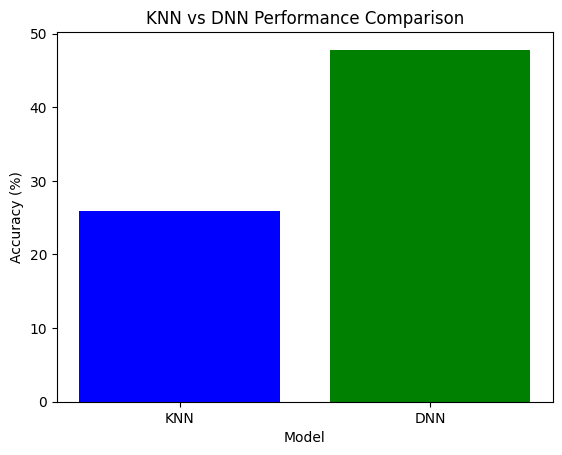

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# 1. 데이터 로드 및 전처리
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 이미지 데이터 정규화 (0~1 범위로 조정)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 레이블을 범주형 데이터로 변환 (one-hot encoding)
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# 2. KNN 모델 학습 및 평가
# 데이터의 크기를 줄이기 위해 1차원으로 변환
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# KNN 모델 정의 및 학습 (k=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_flat[:5000], y_train[:5000].ravel())  # 학습 시간을 줄이기 위해 5000개 샘플만 사용

# KNN 모델 예측 및 정확도 계산
y_pred_knn = knn.predict(x_test_flat)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN 모델 정확도: {knn_accuracy * 100:.2f}%")

# 3. DNN 모델 정의, 학습 및 평가
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))  # 이미지를 1차원으로 변환
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# DNN 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# DNN 모델 학습
model.fit(x_train, y_train_cat, epochs=10, batch_size=64, validation_data=(x_test, y_test_cat), verbose=2)

# DNN 모델 평가
loss, dnn_accuracy = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"DNN 모델 정확도: {dnn_accuracy * 100:.2f}%")

# 4. 결과 비교
models = ['KNN', 'DNN']
accuracies = [knn_accuracy * 100, dnn_accuracy * 100]

plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('KNN vs DNN Performance Comparison')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

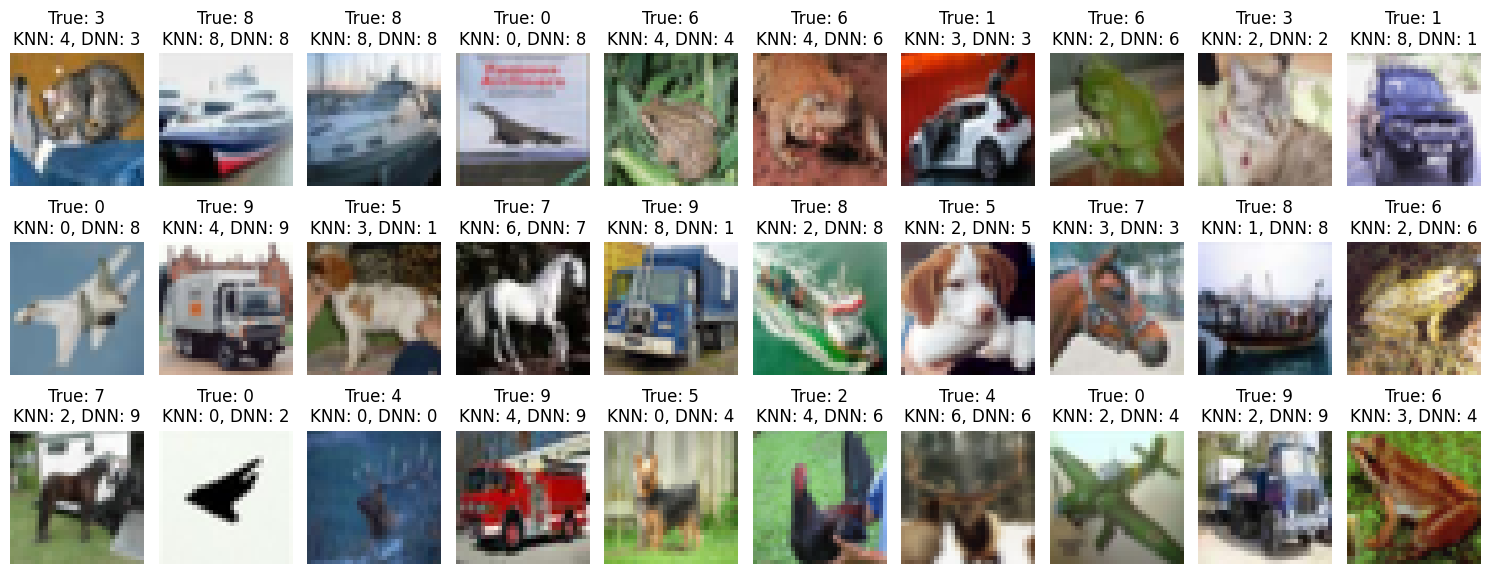

In [6]:
# 5. 30개 이미지에 대한 판정 결과 시각화
fig, axes = plt.subplots(3, 10, figsize=(15, 6))
axes = axes.ravel()
for i in range(30):
    axes[i].imshow(x_test[i])
    knn_label = y_pred_knn[i]
    dnn_label = np.argmax(model.predict(x_test[i:i+1]), axis=1)[0]
    true_label = y_test[i][0]
    axes[i].set_title(f"True: {true_label}\nKNN: {knn_label}, DNN: {dnn_label}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()


##  <font color='orange'> **2. CNN(Convolutional Neural Networks)**

### **[Understanding the Convolutional Filter Operation in CNN’s](https://medium.com/advanced-deep-learning/cnn-operation-with-2-kernels-resulting-in-2-feature-mapsunderstanding-the-convolutional-filter-c4aad26cf32)**

### <font color='red'>**Filter Kernel 함수(Matrix)로 원래 이미지를 Sliding하면서 내적(Inner Product)을 계속 구하면 원래이미지가 축약되어 특징이 만들어짐!**

<img src='https://miro.medium.com/v2/resize:fit:1400/format:webp/1*EQe39aT2EIrjGDG3v5Burg.png'>

<img src ='https://miro.medium.com/v2/resize:fit:1100/format:webp/1*QLzgMSCIaZFZUrrGwiId_w.png'>

<img src='https://miro.medium.com/v2/resize:fit:1400/format:webp/1*q-W6KzTZ-Bsdlw5dbvrCxg.png'>


# 전형적인 합성곱 신경망 (Convolutional Neural Network, CNN)의 구조

이 구조는 이미지 데이터를 입력으로 받아서 이를 특징(feature)으로 변환하고, 최종적으로 분류(classification) 작업을 수행합니다. 이를 간단히 단계별로 설명하겠습니다.

## 1. 입력 단계 (Input)
- **32x32 이미지 입력**: 입력으로 32x32 크기의 흑백 이미지가 제공됩니다. 이 예시에서는 숫자 '3'이 이미지로 들어오는 상황입니다.

## 2. 특징 추출 단계 (Feature Extraction)
- **C1: 첫 번째 합성곱 레이어**: 5x5 필터를 사용해 입력 이미지를 합성곱(Convolution)합니다. 결과적으로 28x28 크기의 특징 맵(feature map)을 얻습니다.
- **S1: 첫 번째 풀링 레이어**: 2x2 서브샘플링(즉, 풀링)을 통해 특징 맵의 크기를 줄여 14x14 크기로 만듭니다. 이렇게 하면 계산량이 줄고 더 중요한 특징을 추출할 수 있습니다.
- **C2: 두 번째 합성곱 레이어**: 다시 5x5 필터를 사용해 더 깊은 특징을 추출합니다. 이 과정으로 10x10 크기의 특징 맵을 얻게 됩니다.
- **S2: 두 번째 풀링 레이어**: 다시 2x2 서브샘플링을 수행하여 5x5 크기의 특징 맵을 얻습니다.

## 3. 분류 단계 (Classification)
- **완전 연결 레이어 (Fully Connected Layer)**: 추출된 특징을 1차원 벡터 형태로 변환한 후, 완전 연결 레이어를 사용하여 이를 최종적으로 분류 작업에 활용합니다. 여기서는 숫자 0부터 9까지의 클래스를 예측하게 됩니다.
- **출력 레이어**: 마지막으로 각 숫자에 대한 확률값을 출력하여, 입력 이미지가 어떤 숫자인지 예측합니다.

---

이러한 구조는 CNN의 전형적인 구조로, 특징을 추출하고 이를 바탕으로 이미지가 어떤 클래스에 속하는지 분류하는 데 사용됩니다. 특징 추출 단계에서는 여러 층의 합성곱과 풀링을 통해 이미지의 중요한 패턴을 점진적으로 학습하고, 마지막 분류 단계에서는 학습한 특징을 바탕으로 이미지의 클래스(여기서는 숫자)를 예측하게 됩니다.

<img src='https://media.licdn.com/dms/image/v2/C5612AQG39VNw5iWz3A/article-cover_image-shrink_600_2000/article-cover_image-shrink_600_2000/0/1529972698881?e=1737590400&v=beta&t=i_ok88SK-XG5S5u_ZzqcuYSI-kWTmJB5gzmD5761UNM'>

KNN 모델 정확도: 25.90%


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
782/782 - 23s - 30ms/step - accuracy: 0.3317 - loss: 1.8612 - val_accuracy: 0.3714 - val_loss: 1.7309
Epoch 2/10
782/782 - 23s - 30ms/step - accuracy: 0.4048 - loss: 1.6635 - val_accuracy: 0.4115 - val_loss: 1.6282
Epoch 3/10
782/782 - 23s - 30ms/step - accuracy: 0.4354 - loss: 1.5852 - val_accuracy: 0.4183 - val_loss: 1.5998
Epoch 4/10
782/782 - 22s - 28ms/step - accuracy: 0.4501 - loss: 1.5332 - val_accuracy: 0.4397 - val_loss: 1.5637
Epoch 5/10
782/782 - 41s - 52ms/step - accuracy: 0.4687 - loss: 1.4904 - val_accuracy: 0.4648 - val_loss: 1.4987
Epoch 6/10
782/782 - 42s - 54ms/step - accuracy: 0.4792 - loss: 1.4501 - val_accuracy: 0.4717 - val_loss: 1.4962
Epoch 7/10
782/782 - 21s - 27ms/step - accuracy: 0.4961 - loss: 1.4167 - val_accuracy: 0.4755 - val_loss: 1.4799
Epoch 8/10
782/782 - 41s - 53ms/step - accuracy: 0.5013 - loss: 1.3959 - val_accuracy: 0.4867 - val_loss: 1.4531
Epoch 9/10
782/782 - 22s - 28ms/step - accuracy: 0.5110 - loss: 1.3705 - val_accuracy: 0.4966 - 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 - 67s - 85ms/step - accuracy: 0.4208 - loss: 1.5836 - val_accuracy: 0.5294 - val_loss: 1.3011
Epoch 2/10
782/782 - 63s - 81ms/step - accuracy: 0.5682 - loss: 1.2162 - val_accuracy: 0.5895 - val_loss: 1.1603
Epoch 3/10
782/782 - 84s - 107ms/step - accuracy: 0.6231 - loss: 1.0653 - val_accuracy: 0.6473 - val_loss: 1.0154
Epoch 4/10
782/782 - 82s - 105ms/step - accuracy: 0.6594 - loss: 0.9735 - val_accuracy: 0.6601 - val_loss: 0.9743
Epoch 5/10
782/782 - 82s - 105ms/step - accuracy: 0.6865 - loss: 0.8957 - val_accuracy: 0.6425 - val_loss: 1.0247
Epoch 6/10
782/782 - 81s - 104ms/step - accuracy: 0.7060 - loss: 0.8403 - val_accuracy: 0.6830 - val_loss: 0.9054
Epoch 7/10
782/782 - 83s - 106ms/step - accuracy: 0.7237 - loss: 0.7912 - val_accuracy: 0.7010 - val_loss: 0.8789
Epoch 8/10
782/782 - 82s - 105ms/step - accuracy: 0.7423 - loss: 0.7437 - val_accuracy: 0.6857 - val_loss: 0.9115
Epoch 9/10
782/782 - 81s - 104ms/step - accuracy: 0.7551 - loss: 0.7022 - val_accuracy: 0.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45733 (\N{HANGUL SYLLABLE NEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


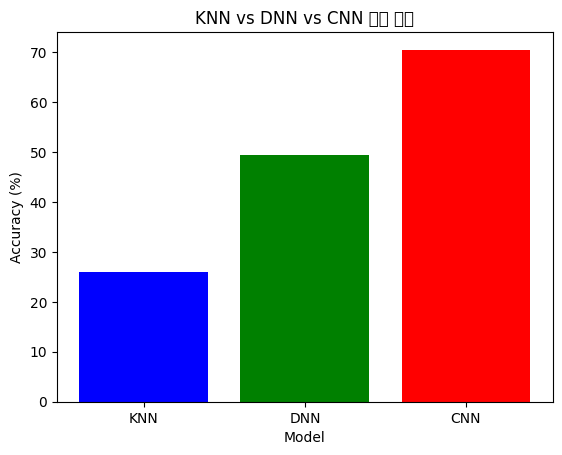

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# 1. 데이터 로드 및 전처리
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 이미지 데이터 정규화 (0~1 범위로 조정)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 레이블을 범주형 데이터로 변환 (one-hot encoding)
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# 2. KNN 모델 학습 및 평가
# 데이터의 크기를 줄이기 위해 1차원으로 변환
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# KNN 모델 정의 및 학습 (k=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_flat[:5000], y_train[:5000].ravel())  # 학습 시간을 줄이기 위해 5000개 샘플만 사용

# KNN 모델 예측 및 정확도 계산
y_pred_knn = knn.predict(x_test_flat)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN 모델 정확도: {knn_accuracy * 100:.2f}%")

# 3. DNN 모델 정의, 학습 및 평가
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))  # 이미지를 1차원으로 변환
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# DNN 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# DNN 모델 학습
model.fit(x_train, y_train_cat, epochs=10, batch_size=64, validation_data=(x_test, y_test_cat), verbose=2)

# DNN 모델 평가
loss, dnn_accuracy = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"DNN 모델 정확도: {dnn_accuracy * 100:.2f}%")

# 4. CNN 모델 정의, 학습 및 평가
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))

# CNN 모델 컴파일
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# CNN 모델 학습
cnn_model.fit(x_train, y_train_cat, epochs=10, batch_size=64, validation_data=(x_test, y_test_cat), verbose=2)

# CNN 모델 평가
loss, cnn_accuracy = cnn_model.evaluate(x_test, y_test_cat, verbose=0)
print(f"CNN 모델 정확도: {cnn_accuracy * 100:.2f}%")

# 5. 결과 비교
models = ['KNN', 'DNN', 'CNN']
accuracies = [knn_accuracy * 100, dnn_accuracy * 100, cnn_accuracy * 100]

plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('KNN vs DNN vs CNN')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━

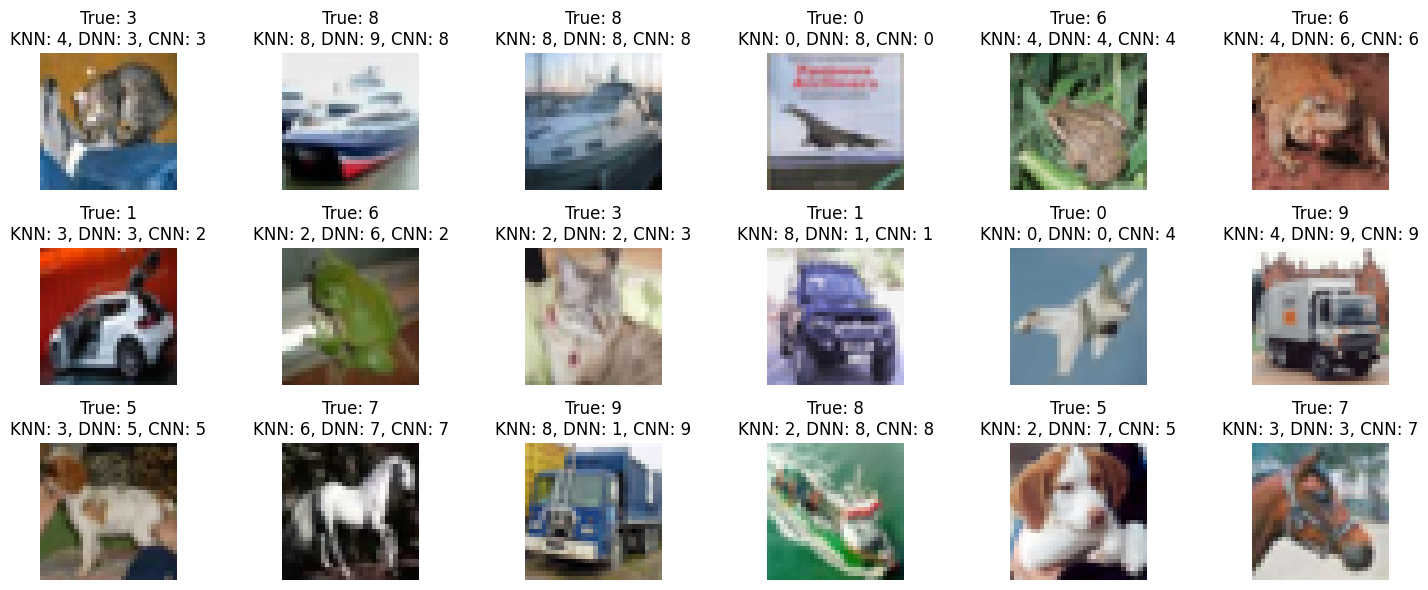

In [8]:

# 6. 18개 이미지에 대한 판정 결과 시각화
fig, axes = plt.subplots(3, 6, figsize=(15, 6))
axes = axes.ravel()
for i in range(18):
    axes[i].imshow(x_test[i])
    knn_label = y_pred_knn[i]
    dnn_label = np.argmax(model.predict(x_test[i:i+1]), axis=1)[0]
    cnn_label = np.argmax(cnn_model.predict(x_test[i:i+1]), axis=1)[0]
    true_label = y_test[i][0]
    axes[i].set_title(f"True: {true_label}\nKNN: {knn_label}, DNN: {dnn_label}, CNN: {cnn_label}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

## <font color='orange'> **3. WordEmbedding Layer**

<table style="background-color: orange; padding: 10px;">
<tr>
<td>

<img src='https://lilianweng.github.io/posts/2017-10-15-word-embedding/word2vec-skip-gram.png'>

</td>
</tr>
</table>
